In [9]:
from scipy.stats import bernoulli
from functions import read_input_data, cal_income
from constants import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
income_fp = './data/age_coefficients_and_var.xlsx'
mortal_fp = './data/Conditional Survival Prob Feb 16.xlsx'
age_coeff, std, surv_prob = read_input_data(income_fp, mortal_fp)
print(age_coeff)
print('\n')
print(std.loc[:, 'Labor Income Only'])

                              a         b1         b2        b3
No High School         41078.88 -2201.5820  78.223410 -0.788948
High School Graduates  28752.76  -917.5466  51.095140 -0.608928
College Graduates     -51819.03  3553.4590   0.933759 -0.549925


                  No High School  High School Graduates  College Graduates
sigma_permanent         0.157162               0.137113           0.143875
sigma_transitory        0.339190               0.233773           0.229565


In [38]:
N_SIM = 100000
AltDeg = 4
D0 = 25000
P_BAR = 3483.25
rate = 0.07
income = cal_income(age_coeff)
sigma_perm = std.loc['sigma_permanent', 'Labor Income Only'][education_level[AltDeg]]
sigma_tran = std.loc['sigma_transitory', 'Labor Income Only'][education_level[AltDeg]]

In [6]:
# generate random walk and normal r.v.
rn_perm = np.random.normal(MU, sigma_perm, (N_SIM, RETIRE_AGE - START_AGE + 1))
rand_walk = np.cumsum(rn_perm, axis=1)
rn_tran = np.random.normal(MU, sigma_tran, (N_SIM, RETIRE_AGE - START_AGE + 1))
inc_with_inc_risk = np.multiply(np.exp(rand_walk) * np.exp(rn_tran), income)

# - retirement
ret_income_vec = ret_frac[AltDeg] * np.tile(inc_with_inc_risk[:, -1], (END_AGE - RETIRE_AGE, 1)).T
inc_with_inc_risk = np.append(inc_with_inc_risk, ret_income_vec, axis=1)

In [7]:
inc_with_inc_risk.shape

(100000, 79)

In [8]:
inc_with_inc_risk[0]

array([14637.30006382, 17537.46786292, 21525.63849246, 29732.80474924,
       33491.0005622 , 34362.77624676, 22186.89569831, 15667.24563363,
       17930.78250881, 16280.74697874, 17930.78704003, 23222.27144035,
       16759.56623123, 25140.10891706, 19877.81369852, 21653.75324203,
       13685.66918801, 34372.42932258, 28534.98417593, 13043.04044603,
       40888.24204476, 32180.72054162, 26543.77357916, 34480.8874627 ,
       29218.42623155, 28962.03398308, 28115.56752465, 22282.98825007,
       36264.87703633, 29512.9519896 , 32238.92575085, 66152.18427731,
       40519.15469027, 35475.02879147, 41373.86090364, 22995.47368102,
       38745.32310998, 39298.45154103, 20723.08798442, 23326.1564829 ,
       16956.18791164, 13862.49784039, 15854.14714482, 17546.28894528,
        7923.90408769,  7923.90408769,  7923.90408769,  7923.90408769,
        7923.90408769,  7923.90408769,  7923.90408769,  7923.90408769,
        7923.90408769,  7923.90408769,  7923.90408769,  7923.90408769,
      

In [21]:
Y = inc_with_inc_risk
D = np.zeros(inc_with_inc_risk.shape)
D[:, 0] = D0
P = np.zeros(inc_with_inc_risk.shape)

In [55]:
for t in range(END_AGE - START_AGE):
    cond1 = np.logical_and(Y[:, t] >= 2*P_BAR, D[:, t] >= P_BAR)
    cond2 = np.logical_and(Y[:, t] >= 2*D[:, t], D[:, t] < P_BAR)
    cond3 = np.logical_and(Y[:, t] < 2*P_BAR, D[:, t] >= P_BAR)
    cond4 = np.logical_and(Y[:, t] < 2*D[:, t], D[:, t] < P_BAR)
    
    P[cond1, t] = P_BAR
    P[cond2, t] = D[cond2, t]
    P[cond3, t] = Y[cond3, t] / 2
    P[cond4, t] = Y[cond4, t] / 2
    
    D[:, t+1] = D[:, t] * (1 + rate) - P[:, t]
    
    print('age:', t+22)
    print('cond1:', cond1.sum())
    print('cond2:', cond2.sum())
    print('cond3:', cond3.sum())
    print('cond4:', cond4.sum())

age: 22
cond1: 99998
cond2: 0
cond3: 2
cond4: 0
age: 23
cond1: 99994
cond2: 0
cond3: 6
cond4: 0
age: 24
cond1: 99994
cond2: 0
cond3: 6
cond4: 0
age: 25
cond1: 99996
cond2: 0
cond3: 4
cond4: 0
age: 26
cond1: 99993
cond2: 0
cond3: 7
cond4: 0
age: 27
cond1: 99991
cond2: 0
cond3: 9
cond4: 0
age: 28
cond1: 99993
cond2: 0
cond3: 7
cond4: 0
age: 29
cond1: 99988
cond2: 0
cond3: 12
cond4: 0
age: 30
cond1: 99985
cond2: 0
cond3: 15
cond4: 0
age: 31
cond1: 99981
cond2: 0
cond3: 19
cond4: 0
age: 32
cond1: 0
cond2: 99999
cond3: 0
cond4: 1
age: 33
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 34
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 35
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 36
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 37
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 38
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 39
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 40
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 41
cond1: 0
cond2: 100000
cond3: 0
cond4: 0
age: 42
cond1: 0
cond2: 1000

In [31]:
cond1 = np.logical_and(Y[:, 0] >= 2*P_BAR, D[:, 0] >= P_BAR)
cond2 = np.logical_and(Y[:, 0] >= 2*D[:, 0], D[:, 0] < P_BAR)
cond3 = np.logical_and(Y[:, 0] < 2*P_BAR, D[:, 0] >= P_BAR)
cond4 = np.logical_and(Y[:, 0] < 2*D[:, 0], D[:, 0] < P_BAR)

In [33]:
P[cond1, 0] = P_BAR
P[cond2, 0] = D[cond2, 0]
P[cond3, 0] = Y[cond3, 0] / 2
P[cond4, 0] = Y[cond4, 0] / 2


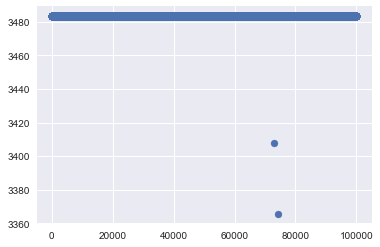

In [36]:
plt.scatter(np.arange(N_SIM), P[:, 0])

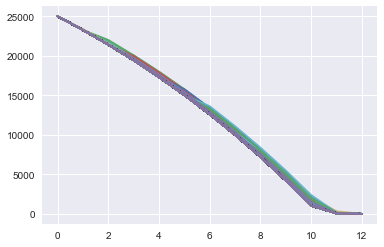

In [52]:
plt.plot(np.arange(13), D[:, :13].T)
plt.show()

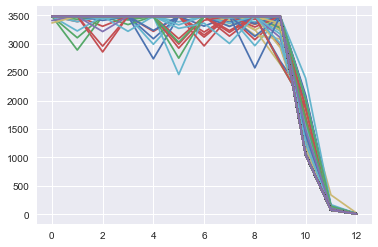

In [53]:
plt.plot(np.arange(13), P[:, :13].T)
plt.show()

In [54]:
(P < P_BAR).sum(axis=0)

array([     2,      6,      6,      4,      7,      9,      7,     12,
           15,     19, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000])

In [57]:
Y - P

array([[11154.05006382, 14054.21786292, 18042.38849246, ...,
         7923.90408769,  7923.90408769,  7923.90408769],
       [21093.30773008, 23910.77611968, 11341.04240953, ...,
        74072.48207133, 74072.48207133, 74072.48207133],
       [10794.31104851, 47671.0115453 , 12180.69415657, ...,
        13967.3531835 , 13967.3531835 , 13967.3531835 ],
       ...,
       [17252.00368062, 19562.94479894, 28418.64729315, ...,
        43345.11924669, 43345.11924669, 43345.11924669],
       [18078.25538307, 18106.30314946, 21350.71175848, ...,
        38045.21617945, 38045.21617945, 38045.21617945],
       [19445.10629261, 17388.33028215, 29033.2638329 , ...,
        11266.1991983 , 11266.1991983 , 11266.1991983 ]])

In [15]:
import multiprocessing as mp
import time

In [16]:
def cube(x):
    return x**3

In [19]:
start = time.time()
pool = mp.Pool(processes=4)
res1 = [pool.apply(cube, args=(x,)) for x in range(1,10000)]
print("--- %s seconds ---" % (time.time() - start))

--- 2.249382972717285 seconds ---


In [20]:
start = time.time()
res2 = []
for x in range(1, 10000):
    res2.append(cube(x))
print("--- %s seconds ---" % (time.time() - start))

--- 0.010087013244628906 seconds ---


In [21]:
res1 == res2


True